In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def normOfDiference(list1,list2):
    arr1=np.array(list1)
    arr2=np.array(list2)
    dif=np.subtract(arr1,arr2)
    return round(np.linalg.norm(dif),3)

allBestData_df=pd.read_excel("BestMedianResults.xlsx",index_col=0)





data={}
for ref in range(len(allBestData_df.columns)):   
    fila=[]
    list1=allBestData_df.iloc[-8:,ref].to_list()
    rowName=allBestData_df.iloc[-8:,ref].name
    for i in range(len(allBestData_df.columns)):
        list2=allBestData_df.iloc[-8:,i].to_list()
        fila.append(normOfDiference(list1,list2))
    data[rowName]=fila

relationMatrix=pd.DataFrame(data,index=allBestData_df.columns)
mIndex=[]
for i in relationMatrix.columns.to_list():
    mIndex.append((int(i[:4]),int(i[5:])))

# 
index = pd.MultiIndex.from_tuples(mIndex, names=["Year", "Week"])


RelationMatrix=pd.DataFrame(relationMatrix.values,index,columns=index)
AllBestData=pd.DataFrame(allBestData_df.values,allBestData_df.index,columns=index)
    


In [2]:
index


MultiIndex([(2015, 40),
            (2015, 41),
            (2015, 42),
            (2015, 43),
            (2015, 44),
            (2015, 45),
            (2015, 46),
            (2015, 47),
            (2015, 48),
            (2015, 49),
            (2015, 50),
            (2015, 51),
            (2015, 52),
            (2015, 53),
            (2016,  1),
            (2016,  2),
            (2016, 38),
            (2016, 39),
            (2016, 40),
            (2016, 41),
            (2016, 42),
            (2016, 43),
            (2016, 44),
            (2016, 45),
            (2016, 46),
            (2016, 47),
            (2016, 48),
            (2016, 49),
            (2016, 50),
            (2016, 51),
            (2016, 52),
            (2017,  1),
            (2017,  2),
            (2017, 38),
            (2017, 39),
            (2017, 40),
            (2017, 41),
            (2017, 42),
            (2017, 43),
            (2017, 44),
            (2017, 45),
            (201

In [ ]:
"se pasa como input la semana de referencia"

def refTupleGenerator(ref):
    
    
    
    
    

In [3]:
RelationMatrix.loc[(2015,52):(2016,2),(2016,2)]

Year  Week
2015  52      12.262
      53      12.828
2016  1        5.506
      2        0.000
Name: (2016, 2), dtype: float64

In [4]:
RelationMatrix[2016,52][2015].loc[52-2:52+2]

Week
50    12.303
51     8.383
52    12.065
53    10.979
Name: (2016, 52), dtype: float64

In [5]:
"""Estrategia 1 """

ref=52


newRow=[RelationMatrix[2016,ref][2015].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2017,ref][2016].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2018,ref][2017].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2019,ref][2018].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2020,ref][2019].loc[ref-2:ref+2].idxmin()]
print(newRow)
pd.concat([RelationMatrix[2016,ref][2015].loc[ref-2:ref+2],
           RelationMatrix[2017,ref][2016].loc[ref-2:ref+2],
           RelationMatrix[2018,ref][2017].loc[ref-2:ref+2],
           RelationMatrix[2019,ref][2018].loc[ref-2:ref+2],
           RelationMatrix[2020,ref][2019].loc[ref-2:ref+2]],axis=1).sort_values("Week")


def ParamEstimator(ref,relationMatrix,allMedianResults,Estrategy=1):
    years=[2016,2017,2018,2019,2020]
    
    if Estrategy==1:
        newRow=[relationMatrix[2016,ref][2015].loc[ref-2:ref+2].idxmin(),
        relationMatrix[2017,ref][2016].loc[ref-2:ref+2].idxmin(),
        relationMatrix[2018,ref][2017].loc[ref-2:ref+2].idxmin(),
        relationMatrix[2019,ref][2018].loc[ref-2:ref+2].idxmin(),
        relationMatrix[2020,ref][2019].loc[ref-2:ref+2].idxmin()]
        
    if Estrategy==2:
    
        newRow=[relationMatrix[2016,ref][2015].loc[ref-4:ref].idxmin(),
        relationMatrix[2017,ref][2016].loc[ref-4:ref].idxmin(),
        relationMatrix[2018,ref][2017].loc[ref-4:ref].idxmin(),
        relationMatrix[2019,ref][2018].loc[ref-4:ref].idxmin(),
        relationMatrix[2020,ref][2019].loc[ref-4:ref].idxmin()]
        

    pd.Series(newRow,years).plot(title='Week '+str(ref))

    W52=pd.concat([allMedianResults[years[0],newRow[0]],
    allMedianResults[years[1],newRow[1]],
    allMedianResults[years[2],newRow[2]],
    allMedianResults[years[3],newRow[3]],
    allMedianResults[years[4],newRow[4]]],axis=1).iloc[8:,:].T



    new_configuration = {
    "SlFactor":W52.loc[:,"SlFactor"].mean(),
    "TpFactor":W52.loc[:,"TpFactor"].mean(),
    "atrPeriod":W52.loc[:,"atrPeriod"].median(),
    "delta":-1,
    "option":W52.loc[:,"option"].mode().iloc[0],
    "fastEmaPeriod":W52.loc[:,"fastEmaPeriod"].median(),
    "slowEMAPeriod":W52.loc[:,"slowEMAPeriod"].median(),
    "vwapZoneMultiplyer":W52.loc[:,"vwapZoneMultiplyer"].median()
    }

    if new_configuration["option"] == 2:
        new_configuration["delta"] = W52[W52.option==2].delta.mean()

    elif new_configuration["option"] == 1:
        new_configuration["delta"] = W52[W52.option==1].delta.mean()
    else:
        new_configuration["delta"] = 0

    return new_configuration





[51, 52, 51, 51, 50]


In [6]:
"""Estrategia 2"""

ref=50


newRow=[RelationMatrix[2016,ref][2015].loc[ref-4:ref].idxmin(),
           RelationMatrix[2017,ref][2016].loc[ref-4:ref].idxmin(),
           RelationMatrix[2018,ref][2017].loc[ref-4:ref].idxmin(),
           RelationMatrix[2019,ref][2018].loc[ref-4:ref].idxmin(),
           RelationMatrix[2020,ref][2019].loc[ref-4:ref].idxmin()]
print(newRow)
pd.concat([RelationMatrix[2016,ref][2015].loc[ref-4:ref],
           RelationMatrix[2017,ref][2016].loc[ref-4:ref],
           RelationMatrix[2018,ref][2017].loc[ref-4:ref],
           RelationMatrix[2019,ref][2018].loc[ref-4:ref],
           RelationMatrix[2020,ref][2019].loc[ref-4:ref]],axis=1).sort_values("Week")






[46, 46, 48, 48, 47]


,2016,2017,2018,2019,2020
,50,50,50,50,50
Week,,,,,
46,7.941,9.492,11.513,14.665,14.047
47,10.431,11.997,12.372,9.650,8.150
48,10.997,12.315,8.718,6.080,12.284
49,9.212,12.688,12.328,13.251,9.524
50,14.635,14.240,11.723,9.640,13.847


"""Estrategia 3"""

ref=43
ref-=1


newRow=[RelationMatrix[2016,ref][2015].loc[ref-4:ref].idxmin(),
           RelationMatrix[2017,ref][2016].loc[ref-4:ref].idxmin(),
           RelationMatrix[2018,ref][2017].loc[ref-4:ref].idxmin(),
           RelationMatrix[2019,ref][2018].loc[ref-4:ref].idxmin(),
           RelationMatrix[2020,ref][2019].loc[ref-4:ref].idxmin()]
print(newRow)
pd.concat([RelationMatrix[2016,ref][2015].loc[ref-4:ref],
           RelationMatrix[2017,ref][2016].loc[ref-4:ref],
           RelationMatrix[2018,ref][2017].loc[ref-4:ref],
           RelationMatrix[2019,ref][2018].loc[ref-4:ref],
           RelationMatrix[2020,ref][2019].loc[ref-4:ref]],axis=1).sort_values("Week")






{'SlFactor': 3.72,
 'TpFactor': 5.54,
 'atrPeriod': 19.0,
 'delta': 0.16599999999999998,
 'option': 2.0,
 'fastEmaPeriod': 5.0,
 'slowEMAPeriod': 14.0,
 'vwapZoneMultiplyer': 3.0}

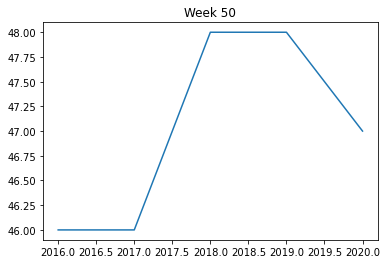

In [7]:
years=[2016,2017,2018,2019,2020]
pd.Series(newRow,years).plot(title='Week '+str(ref))

W52=pd.concat([AllBestData[years[0],newRow[0]],
    AllBestData[years[1],newRow[1]],
    AllBestData[years[2],newRow[2]],
    AllBestData[years[3],newRow[3]],
    AllBestData[years[4],newRow[4]]],axis=1).iloc[8:,:].T



new_configuration = {
    "SlFactor":W52.loc[:,"SlFactor"].mean(),
    "TpFactor":W52.loc[:,"TpFactor"].mean(),
    "atrPeriod":W52.loc[:,"atrPeriod"].median(),
    "delta":-1,
    "option":W52.loc[:,"option"].mode().iloc[0],
    "fastEmaPeriod":W52.loc[:,"fastEmaPeriod"].median(),
    "slowEMAPeriod":W52.loc[:,"slowEMAPeriod"].median(),
    "vwapZoneMultiplyer":W52.loc[:,"vwapZoneMultiplyer"].median()
}

if new_configuration["option"] == 2:
    new_configuration["delta"] = W52[W52.option==2].delta.mean()

elif new_configuration["option"] == 1:
    new_configuration["delta"] = W52[W52.option==1].delta.mean()
else:
    new_configuration["delta"] = 0
    
new_configuration


In [8]:
ParamEstimator(2,RelationMatrix,AllBestData,Estrategy=1)

ValueError: attempt to get argmin of an empty sequence

In [ ]:
for i in AllBestData[2016].columns.tolist():
    ref=i
    if ref 
